<a href="https://colab.research.google.com/github/saeed2016/ML_cancer_predication/blob/master/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import files
files.upload()

In [4]:
df = pd.read_csv('mammographic_masses.data',na_values=['?'],names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'Severity'] )
df.isna().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
Severity     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 16.,   0.,   0.,  59.,   0.,   0., 798.,   0.,   0.,  12.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

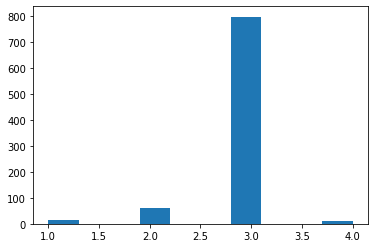

In [5]:
plt.hist(df.density)

In [ ]:
# df.loc[(df.BI_assessment=='?'),'BI_assessment'] = np.nan
# df.loc[(df.Age=='?'),'Age'] = np.nan
# df.loc[(df.Shape=='?'),'Shape'] = np.nan
# df.loc[(df.Margin=='?'),'Margin'] = np.nan
# df.loc[(df.Density=='?'),'Density'] = np.nan


In [6]:
df.isna().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
Severity     0
dtype: int64

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
 x = df.drop(['Severity','BI-RADS'], axis=1)
 y = df['Severity']

In [55]:
x['age'] = pd.to_numeric(x.age)
age_mean = x.age.mean()
x['age'].fillna(age_mean, inplace=True)
x.isna().sum()

age         0
shape      31
margin     48
density    76
dtype: int64

In [56]:
x.dtypes

age        float64
shape      float64
margin     float64
density    float64
dtype: object

In [16]:
from sklearn.impute import  SimpleImputer
numerical_imputer = SimpleImputer(strategy='mean')
categorial_imputer = SimpleImputer(strategy='most_frequent')

In [48]:
numerical_transformer = Pipeline(steps=[
            ('imputer', numerical_imputer),
            ('scaler', StandardScaler())])
categorial_transformer = Pipeline(steps=[
    ('imputer', categorial_imputer)                                     
])

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier

In [50]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size= 0.30, random_state=42)

In [60]:
numerical_cols = x_train.select_dtypes(include='float64').columns
preprocessor = ColumnTransformer(
    transformers = [
       ('numeric', numerical_transformer,numerical_cols)             
    ]
)


In [71]:
pipeline_tree = Pipeline(steps=[
              ('preprocessor', preprocessor),
              ('tree_model', DecisionTreeClassifier(max_depth=8, ccp_alpha=0))                  
])

In [ ]:
pipeline_tree.fit(x_train,y_train)

In [73]:
print(accuracy_score(y_test,pipeline_tree.predict(x_test)))

0.7647058823529411


In [66]:
ccp_alpha = [i for i in np.arange(0.00,0.30,0.01)]
max_depth_range = range(1,11)
param_grid = {'tree_model__ccp_alpha':ccp_alpha,'tree_model__max_depth':max_depth_range}

In [ ]:
rand = RandomizedSearchCV(pipeline_tree,param_distributions=param_grid,cv=10,n_iter=10,scoring='accuracy')
rand.fit(x_train, y_train)

In [70]:
rand_df = pd.DataFrame(rand.cv_results_)
max_value = rand_df.loc[(rand_df.mean_test_score== max(rand_df.mean_test_score))]
max_value

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree_model__max_depth,param_tree_model__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.005713,0.000266,0.002535,0.000201,8,0,"{'tree_model__max_depth': 8, 'tree_model__ccp_...",0.75,0.794118,0.776119,0.746269,0.791045,0.761194,0.761194,0.820896,0.641791,0.835821,0.767845,0.050492,1


In [103]:
pipeline_randomForest = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('Forest_model', RandomForestClassifier(
           n_estimators=50,min_samples_leaf=4,min_samples_split=2,
           max_features='sqrt',max_depth=3
       ))                                 
])

In [ ]:
pipeline_randomForest.fit(x_train, y_train)

In [105]:
print(accuracy_score(y_test,pipeline_randomForest.predict(x_test)))

0.8235294117647058


In [79]:
## range of values for hyperparameters are considered
max_depth=[3,7,8,9,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_features= ['auto', 'sqrt']
min_samples_leaf=[1, 2, 4]
min_samples_split= [2, 5, 10]
n_estimators=[50,100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [80]:
param_grid = {'Forest_model__max_depth':max_depth,'Forest_model__max_features':max_features,
              'Forest_model__min_samples_leaf':min_samples_leaf,'Forest_model__min_samples_split':min_samples_split,
              'Forest_model__n_estimators':n_estimators}

In [ ]:
rand = RandomizedSearchCV(pipeline_randomForest,param_distributions=param_grid,cv=10, n_iter=10,scoring='accuracy')
rand.fit(x_train,y_train)

In [82]:
rand_df = pd.DataFrame(rand.cv_results_)
max_value =  rand_df.loc[(rand_df.mean_test_score == max(rand_df.mean_test_score))  ]
max_value

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Forest_model__n_estimators,param_Forest_model__min_samples_split,param_Forest_model__min_samples_leaf,param_Forest_model__max_features,param_Forest_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.138496,0.002584,0.010456,0.000451,100,2,4,sqrt,3,"{'Forest_model__n_estimators': 100, 'Forest_mo...",0.779412,0.794118,0.835821,0.776119,0.820896,0.820896,0.746269,0.80597,0.701493,0.880597,0.796159,0.047074,1
